In [511]:
import importlib
import pipeline as pp
import stats_hc as hc
from matplotlib import pyplot as plt
import pandas as pd

# Fake News Corpus

In [512]:
# Pre-defined colors for each type
type_colors = {
    'fake': '#1f77b4',
    'reliable': '#ff7f0e',
    'satire': '#2ca02c',
    'bias': '#d62728',
    'conspiracy': '#9467bd',
    'hate': '#8c564b',
    'state': '#e377c2',
    'clickbait': '#7f7f7f',
    'junksci': '#bcbd22',
    'political': '#17becf',
    'unreliable': '#1f77b4',
    'unknown': 'black',
    'nan': 'black'
}

type_liar_colors = {
    'pants-fire': '#1f77b4',
    'false': '#ff7f0e',
    'mostly-false': '#2ca02c',
    'barely-true': '#d62728',
    'half-true': '#9467bd',
    'mostly-true': '#8c564b',
    'true': '#e377c2'
}

In [513]:
importlib.reload(hc)
liar_set = False
if liar_set:
    data = pd.read_csv("../datasets/liar_dataset/cleaned/combined_cleaned.csv")
    Stat = hc.Statistics(data=data, content_label="statement_cleaned", type_label="label", binary_type_label='label_binary', type_colors=type_liar_colors, domain_label='party', sentence_analysis_label="sentence_analysis")
else:
    data = pd.read_csv("../datasets/sample/dataset.csv")
    Stat = hc.Statistics(data=data, content_label="content_cleaned", type_label="type", binary_type_label='type_binary', type_colors=type_colors, sentence_analysis_label="sentence_analysis")

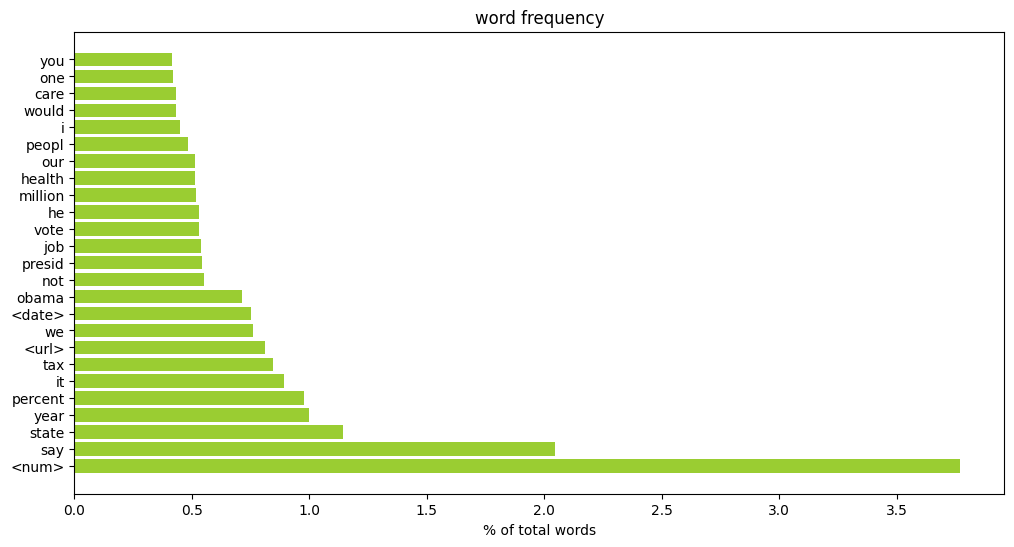

In [514]:
Stat.plot_word_frequency_barplot()

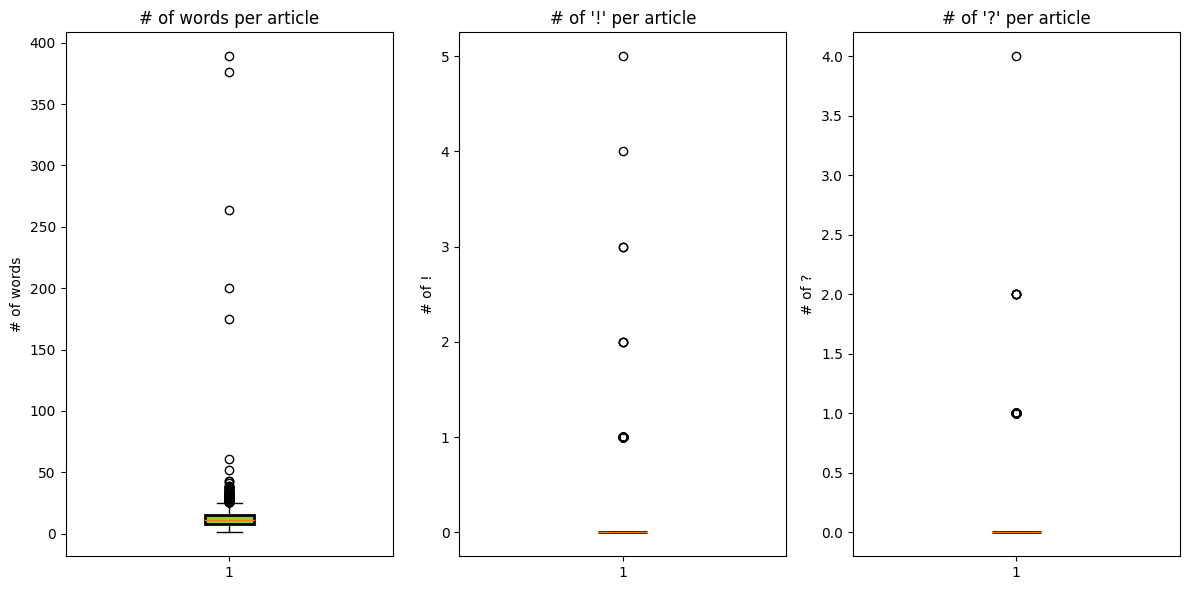

In [515]:
Stat.plot_word_frequency_boxplot()

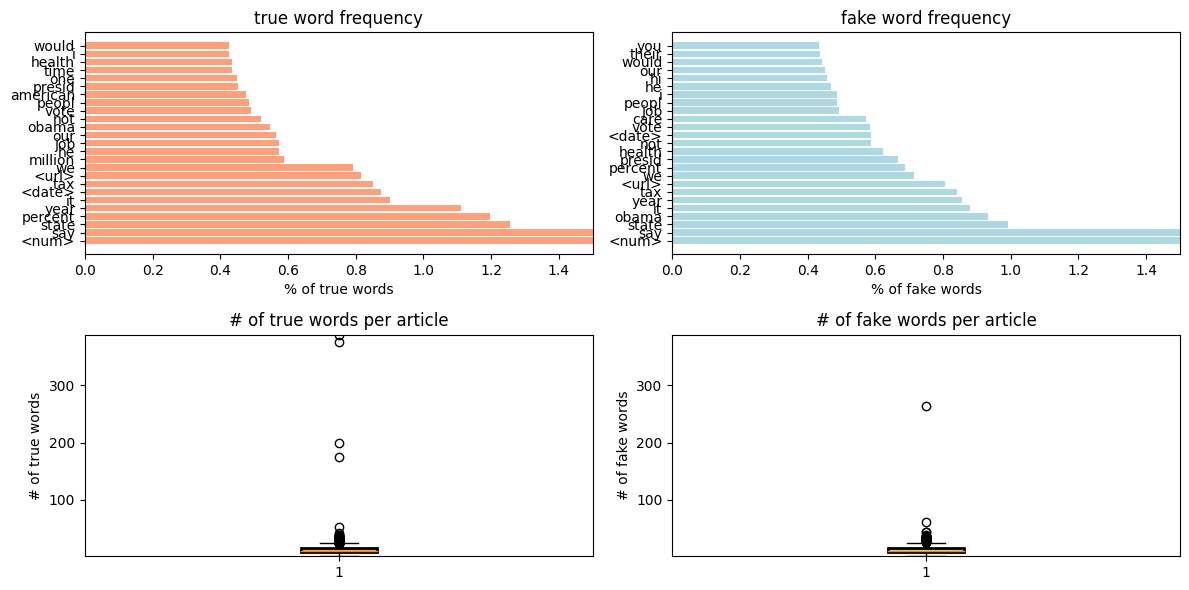

In [516]:
Stat.plot_word_frequency_fake_vs_true()

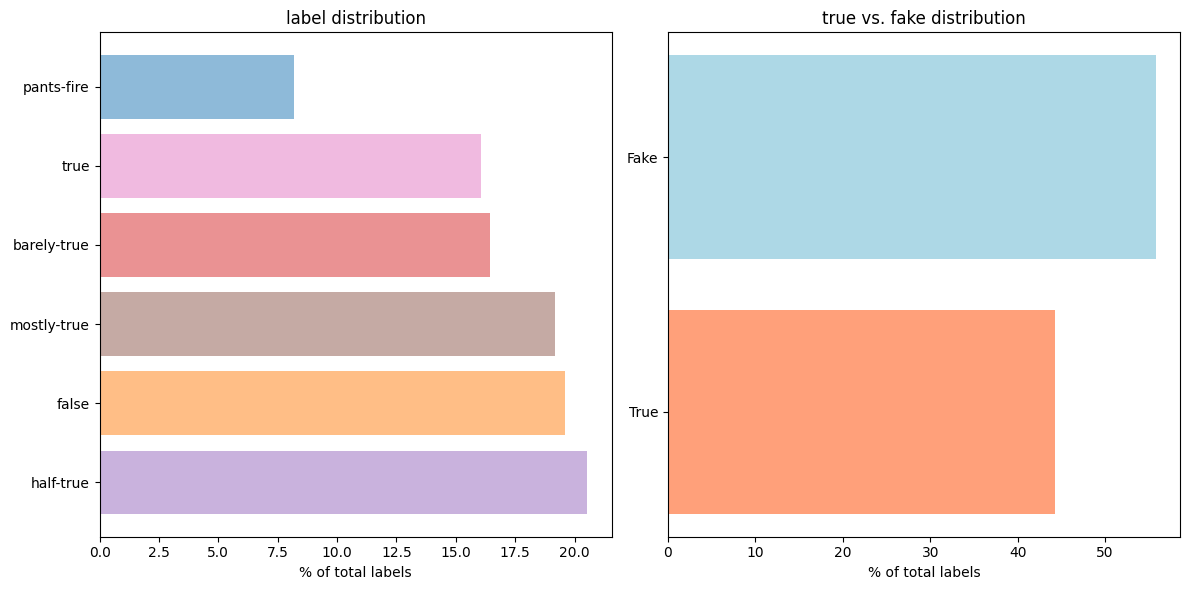

In [517]:
Stat.plot_type_fake_vs_true()

In [518]:
if not liar_set:
    Stat.barplot_domain()

In [519]:
threshold=0
percentage=True
if not liar_set:
    Stat.barplot_x_to_y_contribution(threshold=threshold, percentage=percentage, x_label='domain', y_label='type', content_label='content_cleaned', title=f'domain contribution to label ( ≥ {threshold}%)' if percentage else f'domain contribution to label ( {threshold} most frequent)')

min: -1, max: 33.0


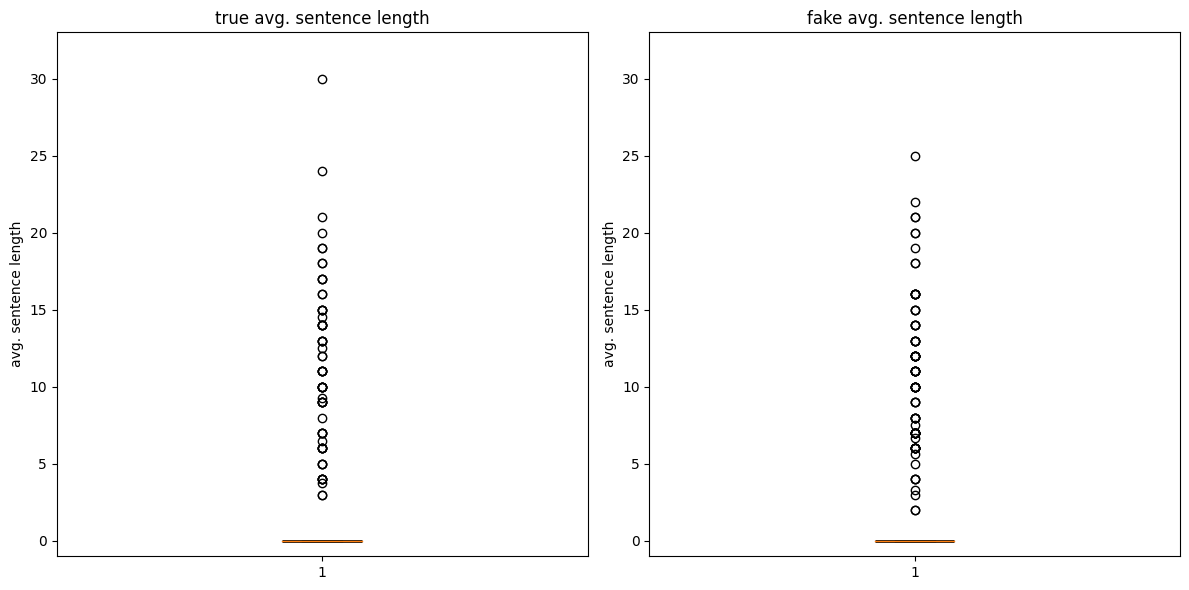

In [520]:
Stat.plot_average_sentence_length_fake_vs_true()

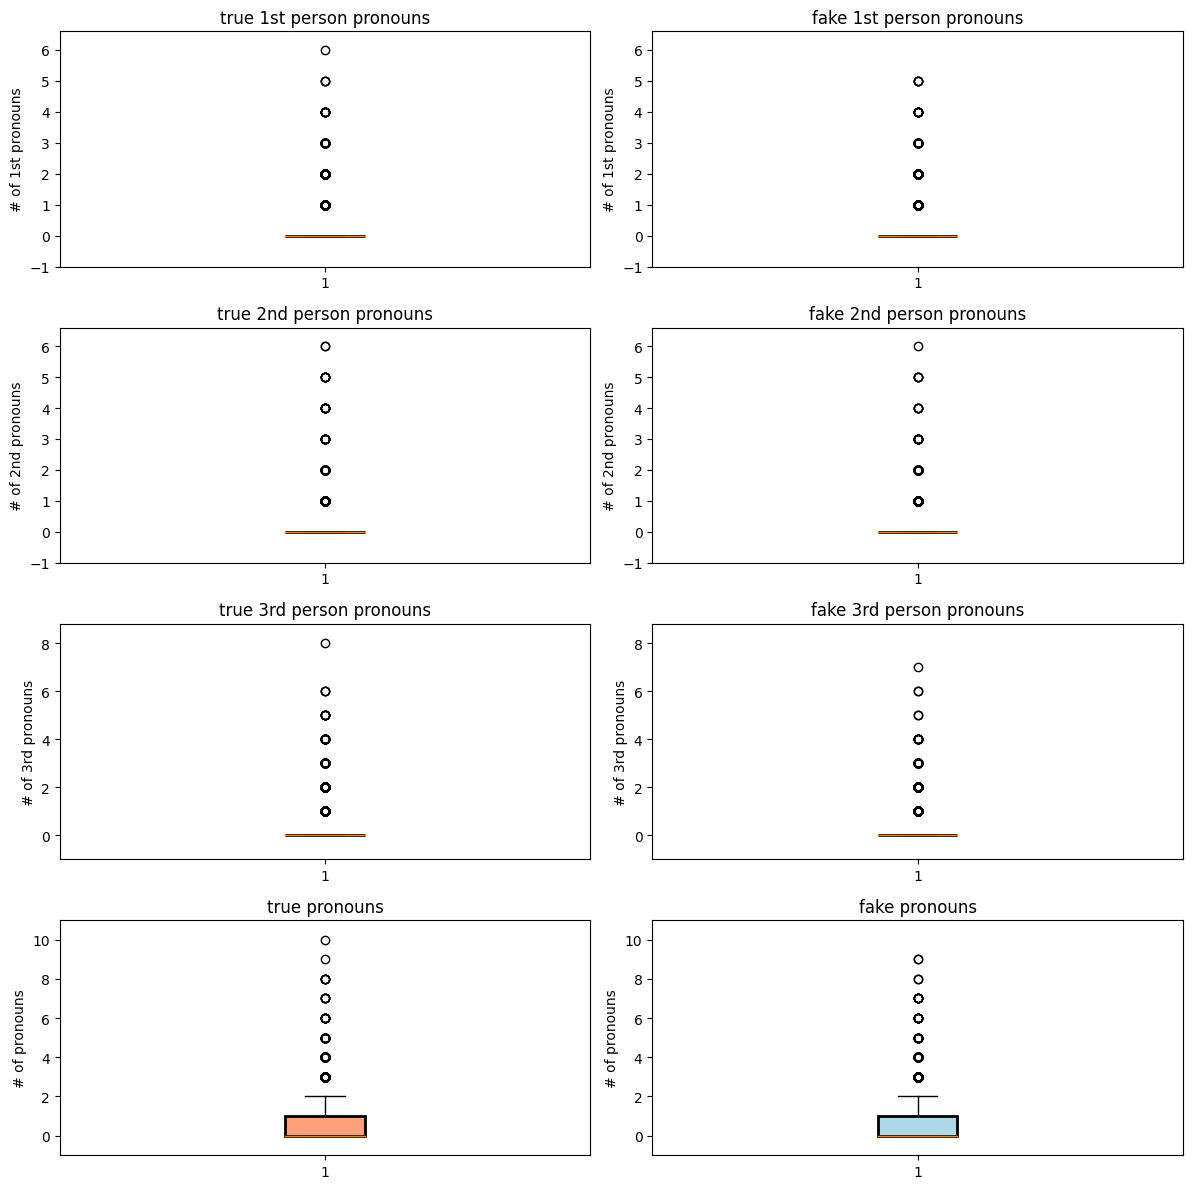

In [521]:
Stat.plot_pronouns_fake_vs_true()

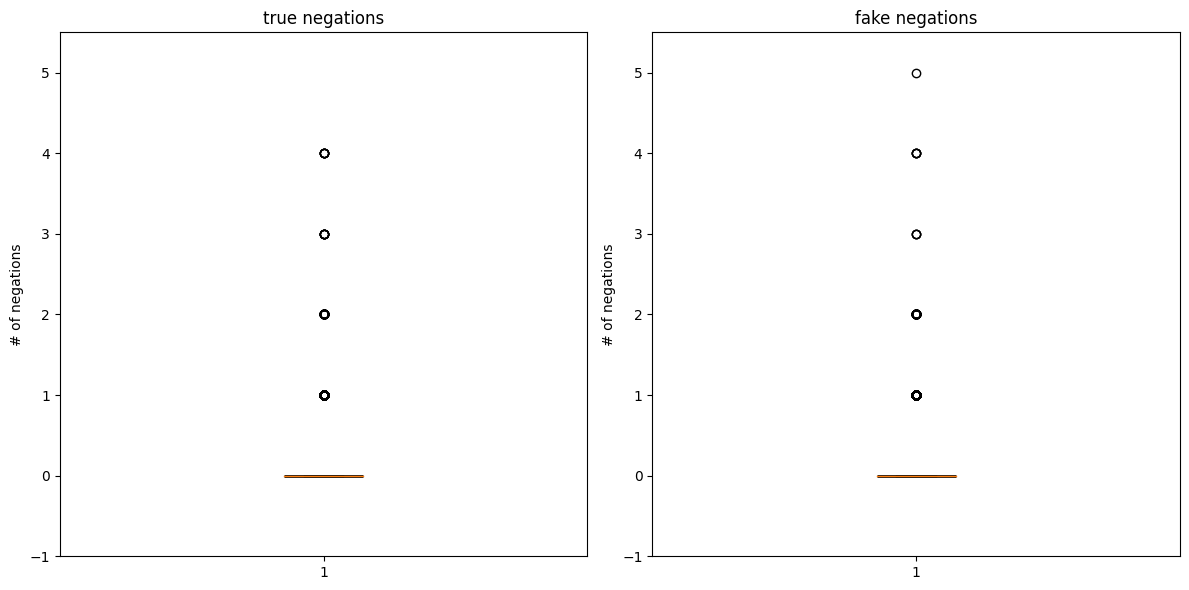

In [522]:
Stat.plot_negations_fake_vs_true()

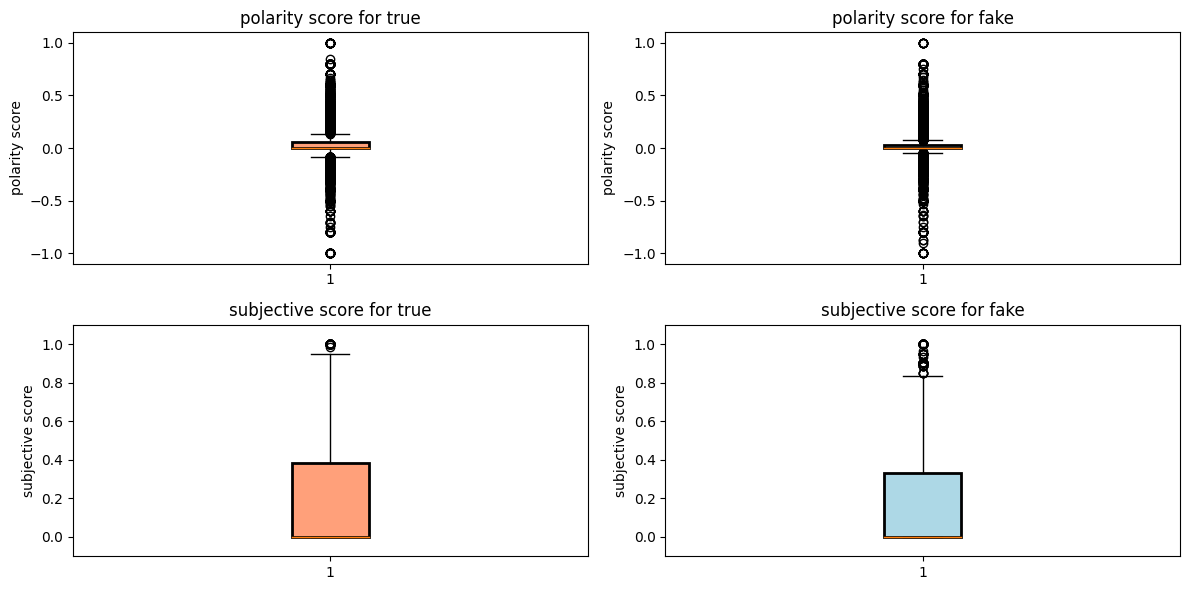

In [523]:
Stat.plot_sentence_analysis_fake_vs_true()